In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=500, noise=0.4, random_state=1)

In [3]:
def plotDataset(x, y, axes):
    plt.plot(x[y==0, 0], x[y==0, 1], 'ro', markersize=3)
    plt.plot(x[y==1, 0], x[y==1, 1], 'g^', markersize=3)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18)

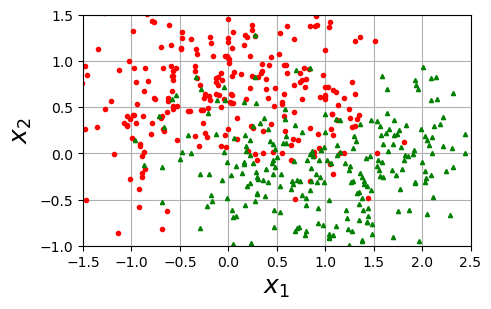

In [4]:
plt.figure(figsize=(5, 3))
plotDataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1)

In [6]:
#Hard Voting Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

logClf = LogisticRegression(solver='lbfgs', random_state=1)
svmClf = SVC(random_state=1)
treeClf = DecisionTreeClassifier(random_state=1)

In [7]:
from sklearn.ensemble import VotingClassifier

hardClf = VotingClassifier([
    ('lr', logClf),
    ('svc', svmClf),
    ('tree', treeClf)
], voting='hard')

hardClf.fit(xTrain, yTrain)
hardClf.predict(xTest[:5])

array([0, 1, 1, 1, 1])

In [8]:
#Evaluate

for clf in (logClf, svmClf, treeClf, hardClf):
    clf.fit(xTrain, yTrain)
    print(clf.__class__.__name__, ':', clf.score(xTest, yTest))

LogisticRegression : 0.8
SVC : 0.816
DecisionTreeClassifier : 0.792
VotingClassifier : 0.824


In [9]:
#Soft Voting Classifier

svmClfProb = SVC(probability=True, random_state=1)

softClf = VotingClassifier([
    ('lr', logClf),
    ('svcProb', svmClfProb),
    ('tree', treeClf)
], voting='soft')

softClf.fit(xTrain, yTrain)
softClf.predict(xTest[:5])

array([1, 1, 1, 1, 1])

In [10]:
#Evaluate

for clf in(logClf, svmClfProb, treeClf, softClf):
    clf.fit(xTrain, yTrain)
    print(clf.__class__.__name__, ':',clf.score(xTest, yTest))

LogisticRegression : 0.8
SVC : 0.816
DecisionTreeClassifier : 0.792
VotingClassifier : 0.816


In [11]:
#Regression

np.random.seed(1)

m = 500
x = 10 * np.random.rand(m, 1) - 6
y = (10 + 6 * x + 5 * x**2 + 30 * np.random.randn(m, 1)).ravel()

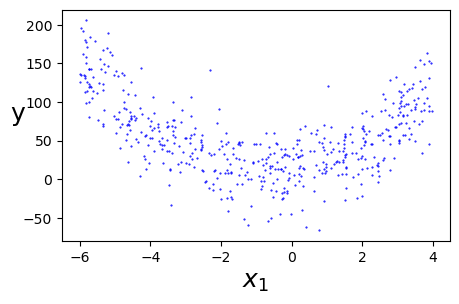

In [12]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, 'b.', markersize=1)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y)

In [14]:
#Ensemble for Regression

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

linReg = LinearRegression()
svmReg = SVR()
treeReg = DecisionTreeRegressor(random_state=1)

In [15]:
from sklearn.ensemble import VotingRegressor

enReg = VotingRegressor([
    ('lr', linReg),
    ('svr', svmReg),
    ('tree', treeReg)
])

enReg.fit(xTrain, yTrain)
enReg.predict(xTest[:3])

array([30.45625438, 46.9567494 , 34.33803825])

In [16]:
#Evaluate

for clf in (linReg, svmReg, treeReg, enReg):
    clf.fit(xTrain, yTrain)
    print(clf.__class__.__name__, ':', clf.score(xTest, yTest))

LinearRegression : 0.04318451420091962
SVR : 0.44741913821374724
DecisionTreeRegressor : 0.18062166113116673
VotingRegressor : 0.4531467235124468
